# Cross-Validation

After this encounter you will
- be aware of the limits of representatibility in the results attained using a train-test-split
- be able to name two optional techniques in using cross validation instead
- be able to interpret the results of cross validation

## Overfitting and Underfitting

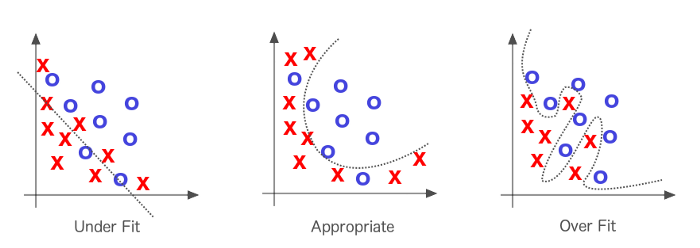

#### What happens during fitting?
* model learns from the data
* model adjusts itself during that process
* adjusting parameters (hyperparameters) during that process
* trying to do a better job of understanding that data

- Overfit Model:  
Intuitively, overfitting occurs when the model or the algorithm fits the data too well.
Overfitting a model result in good accuracy for training data set but poor results on new data sets. 
Such a model is not of any use in the real world as it is not able to predict outcomes for new cases.


- Underfit Model: Underfitting occurs when a statistical model or machine learning algorithm cannot capture the underlying trend of the data. Intuitively, underfitting occurs when the model or the algorithm does not fit the data well enough

### How do we avoid overfitting?
* More data points - bootstrap, synthetically oversample, 
* Fewer features 
* Less complex models - more parameters in a model leads to more overfitting
* Evaluate with `Cross validation` and optimize
* Regularization

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score,KFold,ShuffleSplit

from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
import seaborn as sns

In [ ]:
df = sns.load_dataset("penguins")
df.dropna(inplace=True)
df.head()

In [ ]:
df.columns

In [ ]:
X =  df[['species', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'sex']]
y = df['body_mass_g']

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2)
Xtrain.shape, Xtest.shape

In [ ]:
transformer = ColumnTransformer([('scaling',MinMaxScaler(),['bill_length_mm', 'bill_depth_mm','flipper_length_mm']),
                                ('onehot',OneHotEncoder(drop='first'),['species','sex'])])

In [ ]:
Xtrain_preprocess = transformer.fit_transform(Xtrain)

In [ ]:
Xtrain_preprocess_df = pd.DataFrame(Xtrain_preprocess,columns=transformer.get_feature_names_out())
Xtrain_preprocess_df

In [ ]:
#model
m= LinearRegression()
m.fit(Xtrain_preprocess,ytrain)

In [ ]:
print(f'The training score is {m.score(Xtrain_preprocess,ytrain)}')

In [ ]:
Xtest_preprocess = transformer.transform(Xtest)

In [ ]:
print(f'The training score is {m.score(Xtest_preprocess,ytest)}')

Is this a good model? Are we overfitting? How can we tell?

The difference between the performance with the train and the test data tells us how good is our model at generalizing. BUT its results depend on how the data has been (randomly) split, i.e. we cannot make statements of how well our model will perform on new, unseen data with certainty.

## Cross-Validation

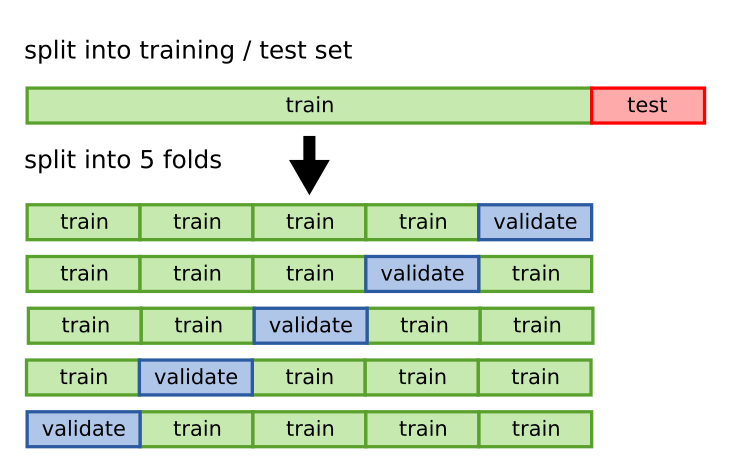

### k-Fold Cross-Validation
- Split the data into k subsets or **folds**
- Reserve one fold as validation set and train on the remaining k-1
- Train and evaluate k separate models
- How do we split the data?
    * indexing your data - row 0 -> row n
    * sort your index
    * split into 1/k portions
    * if n = 100, k=5
        k_1 : 0-19
        k_2 :  20-39
        ...

In [ ]:
kf = KFold(n_splits=3)

In [ ]:
scores = cross_val_score(m,Xtrain_preprocess,ytrain,cv=KFold(5,shuffle=True),scoring='r2') # Kfold used for regression problems
# StratifiedKfold used for classification problems
scores 

In [ ]:
print(f'Validation accuracy scores: {np.round(scores,2)}')
print(f'\nmean: {scores.mean():.2}')
print(f'\nstd: {scores.std():.2}')

### Interpretation of results:
* If training score >> mean(validation_scores), you might be overfitting!
* If training score << mean(validation_scores), you might be underfitting!
* how much above determines how much you think you fear you're overfitting

### Why are we only looking at one algorithm+hyperparameter setting?
* In the real world you want to compare multiple models + hyperparameters
* How can we do this? `GridSearchCV` - encounter on this tomorrow!

## Other variants 
* Shuffle-split - in case we didn't shuffle the data in train test split
* Stratified shuffle-split - it makes folds preserving the percentage of samples for each class 
* Time-series split - this method allows you to split your data mindful of sequential nature of the data

In [ ]:
s = ShuffleSplit(n_splits=10,test_size=.20)


In [ ]:
scores_ss = cross_val_score(estimator=m, # the model to evaluate
                                     X=Xtrain_preprocess,
                                     y=ytrain,
                                     scoring='r2', # evaluation metrics
                                    cv=s, # cross validation splitting
                           ) 


In [ ]:
print(f'Validation accuracy scores: {np.round(scores_ss,2)}')
print(f'\nmean: {scores_ss.mean():.2}')
print(f'\nstd: {scores_ss.std():.2}')